In [716]:
# importing modules and reading the data set
import pandas as pd, numpy as np, csv 
import math
import matplotlib.pyplot as plt
ds = pd.read_csv('kc_house_data.csv')

In [717]:
# Normalizing the data set
ds = (ds - ds.mean())/ds.max()

In [718]:
# Dividing data set into training and testing data sets
training_ds = ds[0:int(0.8*len(ds))].as_matrix()
training_ds = np.insert(training_ds,0,1,axis=1)
test_ds = ds[int(0.8*len(ds)):len(ds)].as_matrix()
test_ds = np.insert(test_ds,0,1,axis=1)

In [719]:
# Diving into features and output
train_x = training_ds[:,:-1]
train_y = training_ds[:,-1]
test_x = test_ds[:,:-1]
test_y = test_ds[:,-1]
alpha = 0.05 # Learning rate
n = train_x.shape[1] # No. of features
theta = np.random.randn(n) # Initial value of thetas
lamda = 0.001 # Regularization Parameter

In [720]:
# Cost function is mean squared error
def mean_squared_error(x,y,theta):
    m = len(x)
    error = np.sum((x.dot(theta)-y).dot(x.dot(theta)-y))
    error= error/(2*m)
    return error

In [721]:
# Cost function is mean absolute error
def mean_absolute_error(x,y,theta):
    m = len(x)
    error = np.sum(np.absolute(x.dot(theta)-y))
    error= error/(2*m)
    return error

In [722]:
# Cost function is mean cubed error
def mean_cubed_error(x,y,theta):
    m = len(x)
    error = np.sum(np.power(x.dot(theta)-y,3))
    error= error/(2*m)
    return error

In [723]:
# Root mean squared error function
def rmse(x,y,theta):
    m = len(x)
    error = np.sum((x.dot(theta)-y).dot(x.dot(theta)-y))
    error = math.sqrt(error/m)
    return error

In [724]:
# Method for gradient descent with mean_squared_error
def gradient_descent_mse(x,y,theta,alpha):
    m = len(x)
    itera = 0
    loss = []
    while True :
        #print("Iteration : ",itera)
        itera = itera+1
        prev_cost = mean_squared_error(x,y,theta)
        loss.append(prev_cost)
        theta = theta - ((alpha)*np.sum(((x.dot(theta)-y))*x.T,axis=1))/m
        if(prev_cost - mean_squared_error(x,y,theta)<0.0005):
#             print("Iteration : ",itera)
            break
        #itera = itera+1
        #print("Cost : ",mean_squared_error(x,y,theta))
#     plt.plot(range(0, len(loss)), loss)
#     plt.xlabel("Iteration")
#     plt.ylabel("Loss")
    return theta

In [725]:
# Method for gradient descent with mean_absolute_error
def gradient_descent_mae(x,y,theta,alpha):
    m = len(x)
    itera = 0
    loss = []
    while True :
        #print("Iteration : ",itera)
        prev_cost = mean_absolute_error(x,y,theta)
        temp = (x.dot(theta)-y)
        #print(temp.shape)
        temp1 = x.copy()
        #print(temp1.shape)
        temp1[temp < 0] *=-1 
        temp1 = temp1.T
        theta = theta - ((alpha)*np.sum(temp1,axis=1))/m
        loss.append(prev_cost)
        itera = itera+1
        if (prev_cost - mean_absolute_error(x,y,theta)<0.0005):
#             print(" Iteration : ",itera)
            break;
        #print("Cost : ",mean_absolute_error(x,y,theta))
#     plt.plot(range(0, len(loss)), loss)
#     plt.xlabel("Iteration")
#     plt.ylabel("Loss")
    return theta

In [726]:
# Method for gradient descent with mean_cubed_error
def gradient_descent_mce(x,y,theta,alpha):
    m = len(x)
    itera = 0
    loss = []
    while True :
        #print("Iteration : ",itera)
        prev_cost = mean_cubed_error(x,y,theta)
        theta = theta - (1.5*(alpha)*np.sum((np.square((x.dot(theta)-y)))*x.T,axis=1))/m
        loss.append(prev_cost)
        itera = itera+1
        if(prev_cost-mean_cubed_error(x,y,theta)<0.0005):
#             print(" Iteration : ",itera )
            break;
        #print("Cost : ",mean_cubed_error(x,y,theta))
#     plt.plot(range(0, len(loss)), loss)
#     plt.xlabel("Iteration")
#     plt.ylabel("Loss")
    return theta

In [727]:
# Method for gradient descent with regularization
def gradient_descent_w_regularization(x,y,theta,alpha,lamda):
    m = len(x)
    itera = 0
    while itera != 10000 :
        print("Iteration : ",itera)
        theta = theta*(1-lamda/m) - ((alpha)*np.sum(((x.dot(theta)-y))*x.T,axis=1))/m
        itera = itera+1
        print("Cost : ",cost_function(x,y,theta))
    return theta

Learining Rate(MAE) :  0.0  , Thetas :  [ 1.  1.  1.  1.  1.]
Learining Rate(MSE) :  0.0  , Thetas :  [ 1.  1.  1.  1.  1.]
Learining Rate(MCE) :  0.0  , Thetas :  [ 1.  1.  1.  1.  1.]
Learining Rate(MAE) :  0.0111111111111  , Thetas :  [ 0.14621168  0.99921675  0.99981346  0.99724858  0.99286725]
Learining Rate(MSE) :  0.0111111111111  , Thetas :  [ 0.22930894  0.99837791  0.97197502  0.99600929  0.98173921]
Learining Rate(MCE) :  0.0111111111111  , Thetas :  [ 0.33432989  0.99752972  0.95401444  0.99483235  0.97313584]
Learining Rate(MAE) :  0.0222222222222  , Thetas :  [ 0.12487372  0.9989869   0.99221498  0.99619029  0.98779759]
Learining Rate(MSE) :  0.0222222222222  , Thetas :  [ 0.16387222  0.99803665  0.96344912  0.99506     0.97673143]
Learining Rate(MCE) :  0.0222222222222  , Thetas :  [ 0.26073162  0.99703394  0.94475808  0.99393478  0.96805191]
Learining Rate(MAE) :  0.0333333333333  , Thetas :  [ 0.10927704  0.99871439  0.98267352  0.99500421  0.98188499]
Learining Rate(M

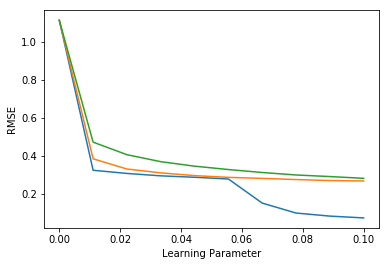

In [728]:
if __name__ == '__main__':

    alp = np.linspace(0,0.1,num=10)
    rmse_mae = []
    rmse_mse = []
    rmse_mce = []
    for alpha_ in alp:
        
        #Using Mean Absolute Error
        theta = np.ones(n) # Initial value of thetas
        theta = gradient_descent_mae(train_x,train_y,theta,alpha_)
        rmse_mae.append(rmse(test_x,test_y,theta))
        print("Learining Rate(MAE) : ",alpha_, " , Thetas : ",theta)
        
        # Using Mean Squared Error in Orange
        theta = np.ones(n) # Initial value of thetas
        theta = gradient_descent_mse(train_x,train_y,theta,alpha_)
        rmse_mse.append(rmse(test_x,test_y,theta))
        print("Learining Rate(MSE) : ",alpha_, " , Thetas : ",theta)
        
        # Using Mean Cubed Error in Blue
        theta = np.ones(n) # Initial value of thetas
        theta = gradient_descent_mce(train_x,train_y,theta,alpha_)
        rmse_mce.append(rmse(test_x,test_y,theta))
        print("Learining Rate(MCE) : ",alpha_, " , Thetas : ",theta)
    
    print("RMSE Mean Absolute Error Method : ",rmse_mae[len(alp)-1])
    print("RMSE Mean Squared Error Method : ",rmse_mse[len(alp)-1])
    print("RMSE Mean Cubed Error Method : ",rmse_mce[len(alp)-1])
    plt.plot(alp,rmse_mae)
    plt.plot(alp,rmse_mse)
    plt.plot(alp,rmse_mce)
    plt.xlabel("Learning Parameter")
    plt.ylabel("RMSE")
